**Visualización para la toma de decisiones con análisis de series de tiempo**

Una de las mayores dificultades que presentan los agricultores en Colombia es la volatilidad de precios que obedece a la cadena de intermediación y a las dinámicas de oferta y demanda (Cárdena, 2021). Estas dinámicas connllevan al productor a recibir una retribución que es inferior al capital invertido en la producción. Es así como el aumento en la productividad puede ayudar a disminuir el efecto de los mercados y la toma de decisiones basada en datos podría ayudar a mejorar los ingresos de los productores (Gafaró y Pellegrina, 2022; De la Peña y Granados, 2024).

...

Es así, como se realizó el análisis de series temporales de los precios de dos productos que podría cultivar un agricultor en xXXX: la papa criolla y la habichuela. Se utilizaron los registros del Sistema de Información de Precios y Abastecimiento del Sector Agropecuario (SIPSA) del DANE (DANE, 2025).

**Referencias**

Cárdenas, L. C. (19 de Enero de 2021). Intermediarios y volatilidad de
precios, problemas de nunca acabar del agro colombiano.
https://bit.ly/2YXLMrW

DANE (2025). Sistema de Información de Precios y Abastecimiento del Sector Agropecuario (SIPSA). Consultado en marzo de 2025. Repositorio disponible en: https://microdatos.dane.gov.co/index.php/catalog/776/get-microdata

Margarita Gáfaro, Heitor S. Pellegrina (2022). Trade, farmers’ heterogeneity, and agricultural productivity: Evidence from Colombia. Journal of International Economics, Vol(137):103598.

Nicolas De la Peña, Oscar M. Granados (2024). Artificial intelligence solutions to reduce information asymmetry for Colombian cocoa small-scale farmers.Information Processing in Agriculture, Vol(11)3:310-324.



In [ ]:
# Vamos a importar las librerias que requerimos para tomar los datos y graficar
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
import seaborn as sns
import numpy as np

In [ ]:
# Abrir Bases de datos
df21 = pd.read_excel('/content/drive/MyDrive/TDO/Mensual_2021.xlsx')
df21['Precio promedio por kilogramo*'] = df21['Precio promedio por kilogramo*']#/1000 #Se dividió por 1000 ya que tenía una coma de más
df22 = pd.read_excel('/content/drive/MyDrive/TDO/mensual 22.xlsx')
df23 = pd.read_excel('/content/drive/MyDrive/TDO/mensual 23.xlsx')
dft = pd.concat([df21,df22,df23])
dft['Precio promedio por kilogramo*'] = dft['Precio promedio por kilogramo*']/1000 * 1000 # dejar unidades completas
dft.head()

,Fecha,Grupo,Producto,Mercado,Precio promedio por kilogramo*
0,2021-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1260.0
1,2021-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",4000.0
2,2021-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",848.0
3,2021-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1550.0
4,2021-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1243.0


In [ ]:
# Vamos a ver todos los productos para elejir 2 de ejemplo
pd.set_option("display.max_rows", None)
dft['Producto'].value_counts()

,count
Producto,
Tomate de árbol,1672
Papa criolla limpia,1581
Pimentón,1547
Habichuela,1465
Cilantro,1426
Lechuga Batavia,1423
Plátano hartón verde,1397
Pepino cohombro,1388
Lulo,1344


In [ ]:
# Vamos a filtrar los precios para la papa criolla y la habichuela en Corabastos en Bogotá
pd.reset_option("display.max_rows") # No mostrar todos los valores
dftmp = dft[((dft['Producto'] == 'Papa criolla limpia') | (dft['Producto'] == 'Habichuela')) & (dft['Mercado']=='Bogotá, D.C., Corabastos')]
dftmp = dftmp.drop(columns=['Grupo','Mercado']) # Eliminamos el grupo y la plaza de mercado ya que no vamos a utilizar estas variables
dftmp

,Fecha,Producto,Precio promedio por kilogramo*
531,2021-01-01,Habichuela,3687.0
2159,2021-01-01,Papa criolla limpia,2516.0
5132,2021-02-01,Habichuela,1704.0
6747,2021-02-01,Papa criolla limpia,3930.0
9711,2021-03-01,Habichuela,2708.0
...,...,...,...
42326,2023-10-01,Papa criolla limpia,3365.0
45281,2023-11-01,Habichuela,3020.0
46856,2023-11-01,Papa criolla limpia,3633.0
49811,2023-12-01,Habichuela,2074.0


(1500.0, 5500.0)

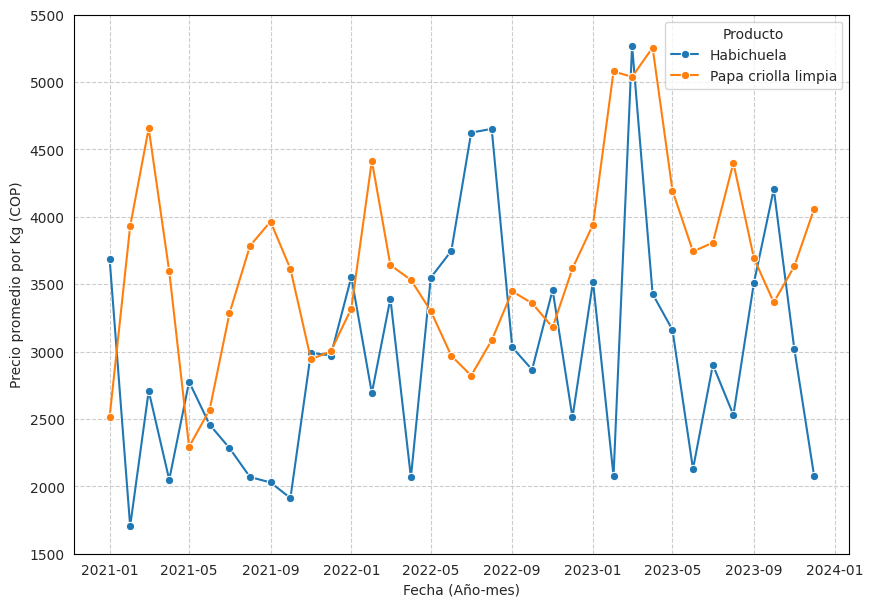

In [ ]:
# Vamos a crear unas figuras de las series de precios de la papa criolla y la habichuela
plt.figure(figsize=(10,7))
sns.set_style("white", {'axes.edgecolor': 'black','grid.linestyle': '--'})
g = sns.lineplot(data=dftmp, x="Fecha", y="Precio promedio por kilogramo*", hue="Producto",marker='o')
plt.grid(True)
plt.xlabel('Fecha (Año-mes)')
plt.ylabel('Precio promedio por Kg (COP)')
plt.ylim(1500, 5500)

**Descomposición en series de tiempo**

La descomposición en series de tiempo permite separar tres componentes fundamentales de una serie de datos en términos temporales: \\
1. Estacionalidad $S_t$: La estacionalidad representa un patron que se repite con una frecuencia en el tiempo. Por ejemplo, las ventas de cometas se intensifican en el mes de agosto principalmente en Colombia y es un patron que se repite año a año.
2. Tendencia $T_t$: Este componente representa el crecimiento, el decrecimiento, o mantenimiento de la serie temporal a lo largo del todo el periodo de los datos. Un ejemplo de ello es la introducción de un operador llamado W al mercado de telefonía móvil que inició con un crecimiento exponencial en el primer año de introducción y se empezó a mantener después de dos años de operaciones.
3. Residual $R_t$: El residual representa el comportamiento aleatorio que compone la serie temporal.

Los dos tipos de descomposicones más utilizadas son la serie aditiva y la multiplicativa que descomonene una serie temporal $y_t$ en sus componentes de acuerdo con las siguientes ecuaciones:

*Serie aditiva:*

$$y_t=S_t+T_t+R_t$$

*Serie multiplicativa:*

$$y_t=S_t\times T_t\times R_t$$

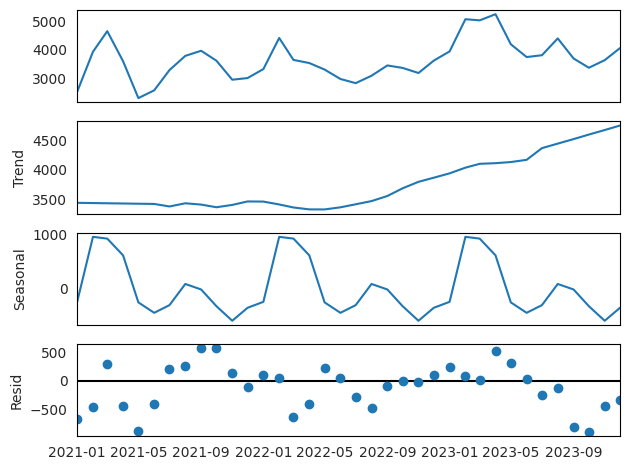

In [ ]:
# Vamos a descomponer el precio de la papa criolla teniendo como tiempo de ciclo 12 meses
# Vamos a filtrar la papa criolla
dfcri = dftmp[dftmp['Producto'] == 'Papa criolla limpia']
#dfcri.info()
# Vamos a importar una librería que hace esta descomposición
from statsmodels.tsa.seasonal import seasonal_decompose
ts = pd.Series(pd.Series(dfcri['Precio promedio por kilogramo*']).values, index=dfcri[('Fecha')])
decompose = seasonal_decompose(ts,model='additive', period=12,extrapolate_trend = 12)
decompose.plot()
plt.show()
residual = decompose.resid
seasonal = decompose.seasonal
trend = decompose.trend
yt = residual + seasonal + trend
#ts
### Calcular para la habichuela
dfhab = dftmp[dftmp['Producto'] == 'Habichuela']
tsh = pd.Series(pd.Series(dfhab['Precio promedio por kilogramo*']).values, index=dfhab[('Fecha')])
decomposeh = seasonal_decompose(tsh,model='additive', period=12,extrapolate_trend = 12)
residualh = decomposeh.resid
seasonalh = decomposeh.seasonal
trendh = decomposeh.trend
yth = residualh + seasonalh + trendh


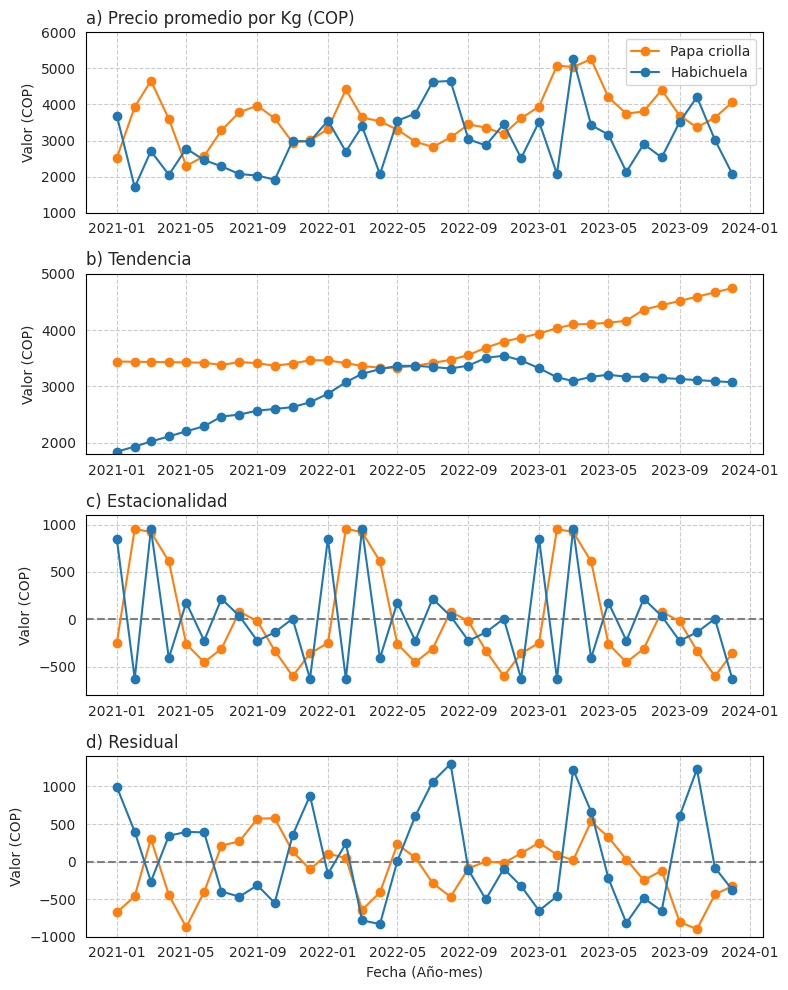

In [ ]:
# Mejorar calidad de imagen

fig, axs = plt.subplots(4, 1, figsize=(8, 10))

axs[0].plot(dfcri['Fecha'], yt, color='tab:orange',marker='o',label='Papa criolla')
axs[0].plot(dfcri['Fecha'], yth, color='tab:blue',marker='o',label='Habichuela')
axs[0].set_title('a) Precio promedio por Kg (COP)',loc="left")
axs[0].set_ylabel('Valor (COP)')
axs[0].set_ylim([1000,6000])
axs[0].legend(loc="upper right")
axs[0].grid(True)

axs[1].plot(dfcri['Fecha'], trend, color='tab:orange',marker='o')
axs[1].plot(dfcri['Fecha'], trendh, color='tab:blue',marker='o')
axs[1].set_title('b) Tendencia',loc="left")
axs[1].set_ylabel('Valor (COP)')
axs[1].set_ylim([1800,5000])
axs[1].grid(True)

axs[2].axhline(0, linestyle='--',color='gray')
axs[2].plot(dfcri['Fecha'], seasonal, color='tab:orange',marker='o')
axs[2].plot(dfcri['Fecha'], seasonalh, color='tab:blue',marker='o')
axs[2].set_title('c) Estacionalidad',loc="left")
axs[2].set_ylabel('Valor (COP)')
axs[2].set_ylim([-800,1100])
axs[2].grid(True)


axs[3].axhline(0, linestyle='--',color='gray')
axs[3].plot(dfcri['Fecha'], residual, color='tab:orange',marker='o')
axs[3].plot(dfcri['Fecha'], residualh, color='tab:blue',marker='o')
axs[3].set_title('d) Residual',loc="left")
axs[3].set_ylabel('Valor (COP)')
axs[3].set_xlabel('Fecha (Año-mes)')
axs[3].set_ylim([-1000,1400])
axs[3].grid(True)

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/TDO/series.eps', format='eps')
plt.savefig('/content/drive/MyDrive/TDO/series.png')
#plt.savefig('/content/drive/MyDrive/TDO/series.pdf')

**Vamos a pasar a la escritura de un manuscrito en Overleaf**

Overleaf es un procesador de texto en LaTeX que es utilizado en ciencias y escritura científica de textos teniendo la posibilidad de visualizar en línea. Esta herramienta permita que varios autores trabajen en un mismo docuemnto y tiene templates precargadas de las revistas indexadas más importantes. Como es un editor en LaTex, la calidad en los textos, figuras y ecuaciones permite mostrar resultados en alta calidad. La plataforma se encuentra disponible en:

https://www.overleaf.com/

La cuenta básica es gratuita, pero tiene la posibilidad de compartir ilimitadamente y visualizar todos los templates en línea.

Vamos a utilizar el formato de preprints de *arXiv*:

https://www.overleaf.com/latex/templates/style-and-template-for-preprints-arxiv-bio-arxiv/fxsnsrzpnvwc

**Tarea**

Realice el informe de visualizaciones en Overleaf utilizando descomposiciones de series temporales. Se recomienda que realice la descomposición para las siguientes variables:
1. Precios de los productos a evaluar
2. Precipitaciones
3. Temperaturas
4. Precio por rendimiento por hectárea

*Recomendaciones:*

* Debe crear las secciones de metodología y de resultados únicamente.
* Tenga en cuenta que las figuras deben seguir el mismo formato de colores.
* Sólo se permite una figura por variable.